In [467]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X1 = np.linspace(0,2,10)-0.5
X2 = -3.5*X1 + np.random.normal(0,1.0,size=(10))+4
data_matrix = np.stack((X1,X2),axis=1)
U,S,Vh = np.linalg.svd(np.transpose(data_matrix))
print(U)

data_matrix_centered = data_matrix.copy()
data_matrix_centered -=np.mean(data_matrix,axis=0)
pca_centered = PCA(n_components=2) #PCA method centers the data
pca_centered.fit(data_matrix_centered)
Uc,S,Vh = np.linalg.svd(np.transpose(data_matrix_centered))

scaler = StandardScaler()
data_matrix_standardised = scaler.fit_transform(data_matrix)
pca_scaled = PCA(n_components=2)
pca_scaled.fit(data_matrix_standardised)
Us,S,Vh = np.linalg.svd(np.transpose(data_matrix_standardised))

[[-0.04109253  0.99915535]
 [ 0.99915535  0.04109253]]
[[-0.23357555  0.97233866]
 [-0.97233866 -0.23357555]]
[[-0.23357555  0.97233866]
 [ 0.97233866  0.23357555]]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


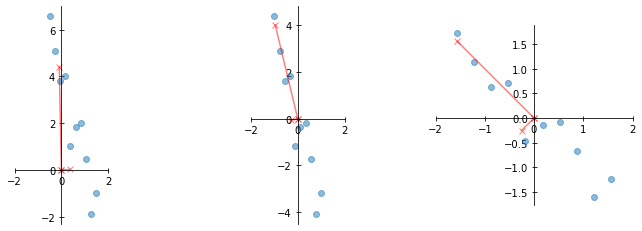

In [471]:
rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
    fig, ax = plt.subplots(1,3,figsize=(12,4))
    
    for i in range(3):
        ax[i].spines['left'].set_position('zero')
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['bottom'].set_position('zero')
        ax[i].spines['top'].set_visible(False)
        ax[i].xaxis.set_ticks_position('bottom')
        ax[i].yaxis.set_ticks_position('left')
        ax[i].set_xlim([-2,2])
        ax[i].set_aspect('equal', adjustable='box')
        ax[i].set_aspect('equal', adjustable='box')
        
    ax[0].plot(data_matrix[:,0],data_matrix[:,1],marker='o',ls='None',alpha=0.5)
    origin = np.array([[0, 0],[0, 0]]) # origin point
    ax[0].plot([0,0.5*S[0]*U[0,0]],[0,S[0]*U[0,1]],marker="x",alpha=0.5,color='red')
    ax[0].plot([0,0.5*S[1]*U[1,0]],[0,S[1]*U[1,1]],marker="x",alpha=0.5,color='red')
      
    ax[1].plot(data_matrix_centered[:,0],data_matrix_centered[:,1],marker='o',ls='None',alpha=0.5)
    origin = np.array([[0, 0],[0, 0]]) # origin point
    ax[1].plot([0,0.5*pca_centered.singular_values_[0]*pca_centered.components_[0,0]],\
               [0,0.5*pca_centered.singular_values_[0]*pca_centered.components_[0,1]],marker="x",alpha=0.5,color='red')
    ax[1].plot([0,0.5*pca_centered.singular_values_[1]*pca_centered.components_[1,0]],\
               [0,0.5*pca_centered.singular_values_[1]*pca_centered.components_[1,1]],marker="x",alpha=0.5,color='red')
    
    ax[2].plot(data_matrix_standardised[:,0],data_matrix_standardised[:,1],marker='o',ls='None',alpha=0.5)
    origin = np.array([[0, 0],[0, 0]]) # origin point
    ax[2].plot([0,0.5*pca_scaled.singular_values_[0]*pca_scaled.components_[0,0]],\
               [0,0.5*pca_scaled.singular_values_[0]*pca_scaled.components_[0,1]],marker="x",alpha=0.5,color='red')
    ax[2].plot([0,0.5*pca_scaled.singular_values_[1]*pca_scaled.components_[1,0]],\
               [0,0.5*pca_scaled.singular_values_[1]*pca_scaled.components_[1,1]],marker="x",alpha=0.5,color='red')
    
    
    plt.savefig("PCA_centered.pdf", bbox_inches='tight')